In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.animation as animation

In [3]:
# Load the input image
img = plt.imread('/Users/vikoluna/Apps/PyCharm/pythonProject/pjViai/g@tu/redcross.png')

In [4]:
# Get the dimensions of the image
h, w, _ = img.shape

# Calculate center of image
center_x = w // 2
center_y = h // 2

print(center_x, center_y)

460 461


In [5]:
# Initialize the radar values array with 3600 samples per angle
radar_values = np.zeros((h // 2, 3600))

In [6]:
# Iterate over angles and radio
for angle in np.arange(0, 3600, 1.0):
    for r in range(h // 2):
        x = int(np.round(center_x + r * np.sin(np.deg2rad(angle))))
        y = int(np.round(center_y + r * np.cos(np.deg2rad(angle))))
        if x < 0 or x >= w or y < 0 or y >= h:
            radar_values[r, int(angle * 1)] = 0
        else:
            radar_values[r, int(angle * 1)] = img[y, x, 0]

In [7]:
# Calculate average values at each angle
avg_values = np.mean(radar_values, axis=0)

In [8]:
# Save radar sweep to text file
data = np.column_stack((np.arange(0, 3600, 1.0), avg_values))
# save the data as a CSV file
np.savetxt('cross.csv', data, delimiter=',', header='C1,C2', comments='', fmt='%.3f')

# os.system('python3 mkMidi.py')

Image dimensions: 920x922


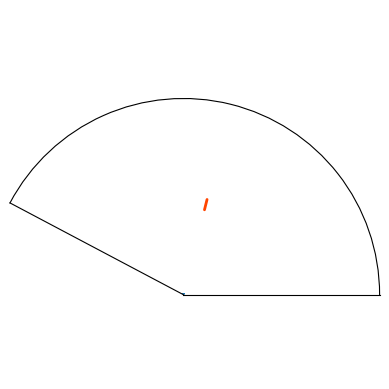

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.deg2rad(np.arange(0, 3600, 1.0)), avg_values)
# ax.plot(np.deg2rad(np.arange(360, 0, -1.0)), radar_values.T)

# set limits of x and y-axis
ax.set_xlim([0, img.shape[1]])
ax.set_ylim([0, img.shape[0]])

# remove ticks and numbers
ax.set_xticks([])
ax.set_yticks([])

# display image dimensions
print(f"Image dimensions: {img.shape[1]}x{img.shape[0]}")

# calculate center of image
center_x = img.shape[1] / 2
center_y = img.shape[0] / 2
max_distance = np.sqrt((img.shape[0] / 2) ** 2 + (img.shape[1] / 2) ** 2)

# create line for radar sweeping
line, = ax.plot([center_x, center_x], [center_y, center_y - 50], color='orangered',
                linewidth=2, solid_capstyle='round')

# define parameters for pulsation
freq = 10
amp = 5

In [10]:
# define function to update line position in animation
def update_line(num):
    angle = np.deg2rad(num)
    r = max_distance + amp * np.sin(2.0 * np.pi * freq * num / num_frames)
    x = center_x + r * np.cos(angle)
    y = center_y - r * np.sin(angle)
    line.set_data([center_x, x], [center_y, y])
    alpha = 1  # (1-r/100)**3 # calculate alpha value based on distance from center
    line.set_linewidth(2)  # (2 + 4*(1-r/1000)) # set line thickness based on distance from center
    line.set_alpha(alpha)  # set alpha value to create beam-like effect
    line.set_solid_capstyle('round')
    return line

# create animation object
num_frames = 1440  # 72 seconds at 50ms per frame
frames = np.linspace(0, 360, num_frames, endpoint=False)
ani = animation.FuncAnimation(fig, update_line, frames=frames,
                              interval=50)


In [11]:
# create video writer
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

# save animation as video
ani.save('mago.mp4', writer=writer)

In [13]:
# add audio to the mp4 file
os.system('ffmpeg -i wizardio.mp3 wizardio.wav')
os.system('ffmpeg -i wizardio.mp3 -i mago.mp4 -map 0:a -map 1:v -c copy -shortest nuevoColor.mp4')

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/concourse/worker/volumes/live/d5b9ea1c-8223-4ff6-7416-83e6b4cd6874/volume/ffmpeg_1587154914508/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilt

0